In [1]:
import ModelViz
from sklearn.cluster import KMeans
from sklearn import metrics

Create an instance of the ModelViz class, then use the functions to 
* `load_data / load_mfdata` to load data
* `load_grid` to load grid information
* `summarise_features` to sum sets of variables together
* `preprocess` to strip boundary and normalise 
* `make_tsds` to reshape data into a time series data set (tsds)
* `load_tsds` to load an existing time series data set from csv
* `train` to create a clustering model
* `load_model` to load an existing model
* `predict` to create predictions based on a tsds and model
* `get_cluster_info` to summarise predictions and calcuate mean/std dev for each cluster
* `plot_map` to plot the cluster output as a map
* `plot_ts` to plot time series for each cluster


## Train the model

Create an instace of ModelViz for the training data, read in that data and grid info

In [5]:
train = ModelViz.ModelViz()
#train.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_200[0-4]*.nc')
# weird formatting of my data....
train.x_strip = slice(15,-15)
train.y_strip = slice(15,-15)

classification = 'biogeo'
depth = 'surface'

if classification == 'physics':
    train.cluster_vars = ['votemper','vosaline','mldr10_1']
    plot_vars={'votemper':'Temperature','vosaline':'Salinity','mldr10_1':'Mixed layer depth'}
if classification == 'biogeo':
    #amm7_1y_median_biogeo.nc
    train.cluster_vars = ['N1_p','N3_n','O2_o','O3_c','O3_TA','N4_n','N5_s']
    plot_vars={'N1_p':'Phosphate','N3_n':'Nitrate','O2_o':'Oxygen','O3_c':'DIC','O3_TA':'Alk.', 'N4_n':'Ammon.', 'N5_s':'Silicate'}
if classification == 'benthic':
    # amm7_mean_2001-2004_benthic.nc
    train.cluster_vars = ['Y2_c','Y3_c','Y4_c','H1_c','H2_c','Q1_c','Q6_c']
    plot_vars = {'Y2_c':'Deposit\nfeeders','Y3_c':'Suspens.\nfeeders','Y4_c':'Meiofauna','H1_c':'Aerobic\nbac','H2_c':'Anaerobic\nbac','Q1_c':'DOC','Q6_c':'POC'}
if classification == 'ecosys':
    train.cluster_vars = ['Phytoplankton','Zooplankton','DOC','POC','B1_c']
    plot_vars={'Phytoplankton':'Phytoplankton','Zooplankton':'Zooplankton','DOC':'DOC','POC':'POC','B1_c':'B1_c'}

if classification == 'benthic':
    filename = '/data/proteus1/scratch/rmi/classifications/COMFORT_data/amm7_mean_2000-2004_'+classification+'*.nc'
else:
    filename = '/data/proteus1/scratch/rmi/classifications/COMFORT_data/amm7_mean_2000-2004_'+depth+'_'+classification+'.nc'

train.load_mfdata(filename)
#train.load_grid('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/domain_cfg.nc')
train.load_grid('/data/sthenno1/to_archive/yuti/yuti-SSB-AMM7-hindcasts/mesh_mask.nc')

sum_vars={'Phytoplankton': ['P1_c', 'P2_c', 'P3_c', 'P4_c'],
            'Zooplankton': ['Z4_c', 'Z5_c', 'Z6_c'],
            'DOM': ['R1_c', 'R2_c', 'R3_c'],
            'POM': ['R4_c', 'R6_c', 'R8_c']}
#train.summarise_features(sum_vars)
train.norm = 'stdev'
train.preprocess(do_slice=False)     
train.make_tsds()

Combine variables and preprocess - stripping the boundary layers and normalising

Make the dataset by reshaping the data into the form needed 

Fit the model (can take some time) and save

In [6]:
train.n_init = 10
train.seed = 800
train.train(n_clusters=6, save=False,model_name = 'kmeans') #, file_path='model.ks')
train.predict()
train.get_cluster_info(save=False)

Processing N1_p


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 49.13it/s]


Processing N3_n


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 52.10it/s]


Processing O2_o


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.06it/s]


Processing O3_c


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.86it/s]


Processing O3_TA


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 45.32it/s]


Processing N4_n


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 51.56it/s]


Processing N5_s


100%|████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 6/6 [00:00<00:00, 53.33it/s]


In [5]:
#from sklearn.cluster import KMeans
#from sklearn import metrics
kmeans = train.model.fit(train.tsds)
labels = kmeans.labels_

print('Silhouette score')
print(metrics.silhouette_score(train.tsds, labels,metric='euclidean'))
print('Calinski Harabasz')
print(metrics.calinski_harabasz_score(train.tsds, labels))
print('Davies Bouldin')
print(metrics.davies_bouldin_score(train.tsds, labels))

Silhouette score
0.4118462
Calinski Harabasz
23863.602851343632
Davies Bouldin
0.9665122993634782


Produce a prediction of the training data

Create cluster dataset with the classification map, plus mean and std dev time series for each cluster

Plot data

PLOT vars
Saving figures


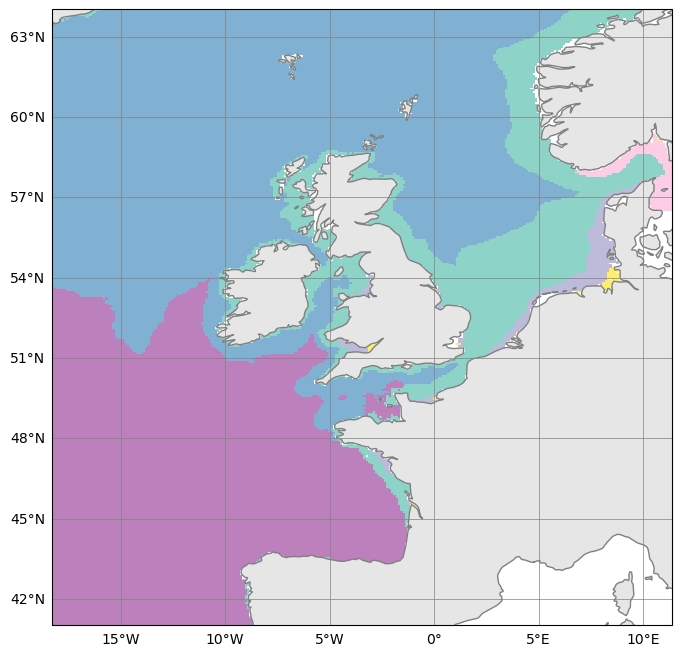

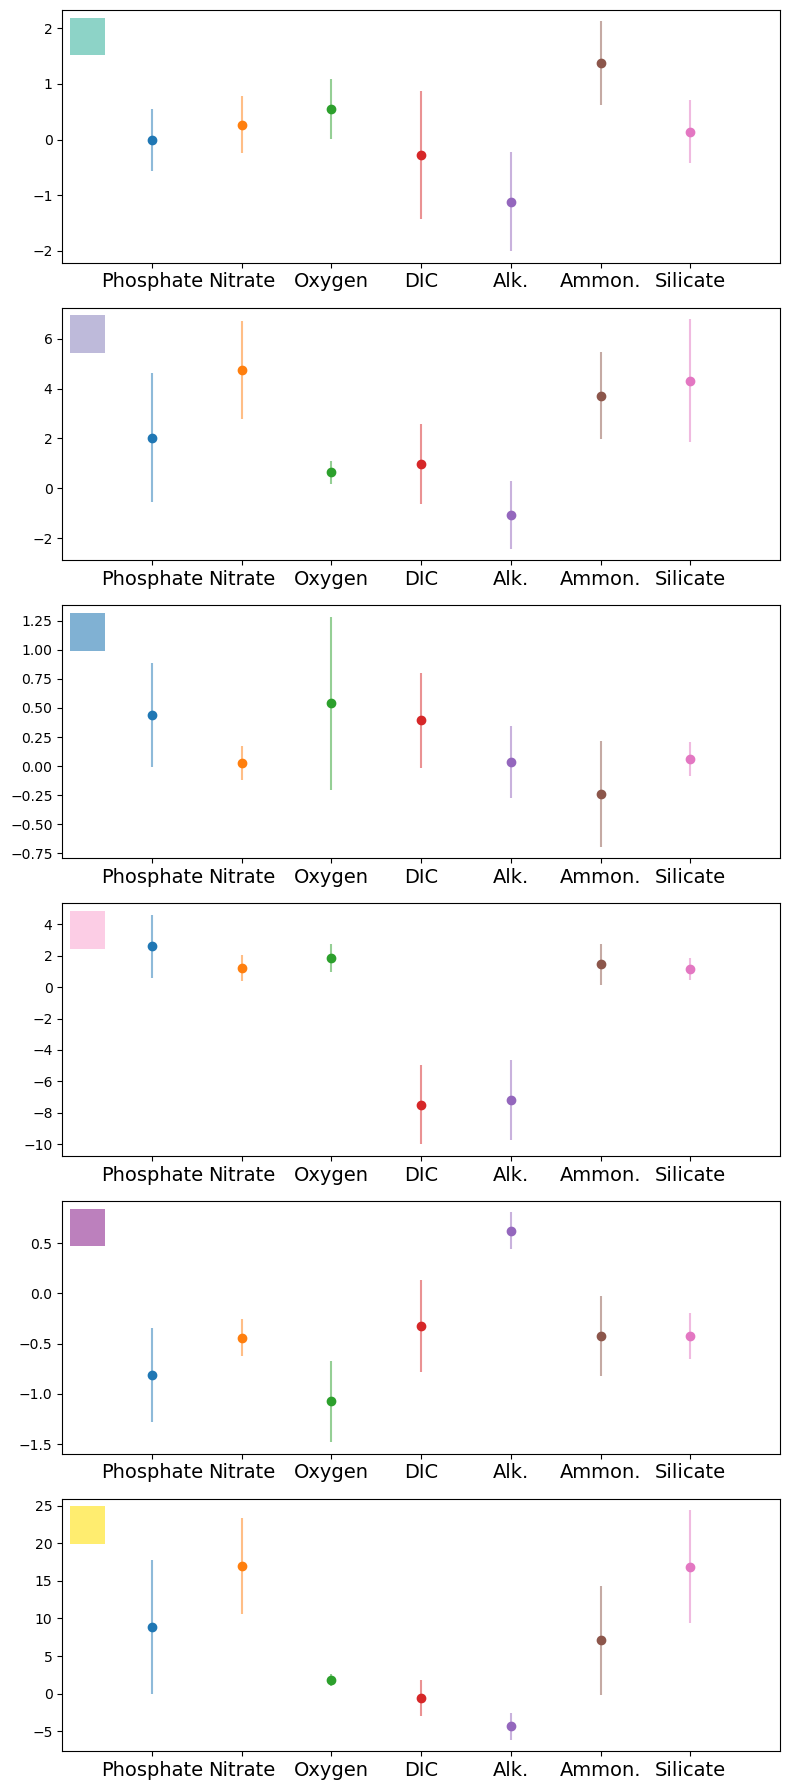

In [7]:
plot_name = '/users/modellers/rmi/Documents/FOCUS/kmeans_figures/k-means-amm7-COMFORT-'+depth+'_'+classification+'_stdev_map_'+str(train.n_clusters)+'.png'
train.plot_map(savefig=True,file_path=plot_name)
plot_name = '/users/modellers/rmi/Documents/FOCUS/kmeans_figures/k-means-amm7-COMFORT-'+depth+'_'+classification+'_stdev_av_'+str(train.n_clusters)+'.png'

train.plot_vars(plot_vars=plot_vars,savefig=True,file_path=plot_name)

## Form prediction using new data

Make a new instance, load our model, and dataset and grid infomation.

In [ ]:
predict = ModelViz.ModelViz()

In [ ]:
predict.load_model('model.ks')

In [ ]:
predict.load_mfdata('../../AMM7-MONTHLY-SURFACE/amm7_200[5-9]*.nc')
predict.load_grid('../../AMM7-MONTHLY-SURFACE/domain_cfg.nc')

In [ ]:
phys = ModelViz.ModelViz()
phys.load_mfdata('/data/proteus1/scratch/dapa/AMM7-MONTHLY-SURFACE/amm7_TS_200[5-9]*.nc')
phys.ds = phys.ds.rename_dims({'y_grid_T':'y','x_grid_T':'x'}).rename({'nav_lat_grid_T':'nav_lat','nav_lon_grid_T':'nav_lon'})
predict.ds = xr.merge([predict.ds,phys.ds[['votemper','vosaline']]])

Summarise and preprocess data

In [ ]:
predict.summarise_features(sum_vars)
predict.cluster_vars = ['votemper','vosaline','N1_p', 'N3_n', 'N4_n', 'N5_s', 'O2_o', 'B1_c','O3_c', 'O3_TA', 'Phytoplankton', 'Zooplankton', 'DOM', 'POM']
predict.preprocess()

Create the tsds, produce the prediction and create cluster dataset

In [ ]:
predict.make_tsds()
predict.predict()
predict.n_clusters = 5
predict.get_cluster_info(save=True, file_path='predicted_clusters.nc')

Plot output

In [ ]:
predict.plot_map()
predict.plot_ts(plot_vars={'votemper':'Temperature','N3_n':'Nitrate','Phytoplankton':'Phyto', 'POM':'POM'})

Plot time series with rescaled values

In [ ]:
predict.cluster_ds = predict.cluster_ds.groupby('time.month').mean().rename({'month':'time'})

In [ ]:
plot_vars = {'N3_n':'Nitrate','votemper':'Temperature'}
predict.plot_ts(plot_vars=plot_vars,rescale=True)